In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# color dict (use: colors['XColor'])

colors = {'DBrwn' : '#8c510a', 'MBrwn' : '#d8b365', 'LBrwn' : '#f6e8c3',
          'DTeal' : '#01665e', 'MTeal' : '#5ab4ac', 'LTeal' : '#c7eae5',
          'DPurp' : '#762a83', 'MPurp' : '#af8dc3', 'LPurp' : '#e7d4e8'
         }

# colors for seaborn
dark = ["#8c510a", "#01665e", "#762a83"]
med = ["#d8b365", "#5ab4ac", "#af8dc3"]

In [3]:
#burn_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_burnup_learning_curve.csv')
#enri_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_enrichment_learning_curve.csv')
#cool_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_cooling_learning_curve.csv')
#rxtr_lc = pd.read_csv('../results/4oct2018/trainset3_fissact_m60_reactor_learning_curve.csv')
rxtr_lc = pd.read_csv('../trainset3_fissact_m60_reactor_learning_curve.csv')
burn_lc = pd.read_csv('../trainset3_fissact_m60_burnup_learning_curve.csv')
enri_lc = pd.read_csv('../trainset3_fissact_m60_enrichment_learning_curve.csv')
cool_lc = pd.read_csv('../trainset3_fissact_m60_cooling_learning_curve.csv')

In [4]:
burn_lc.loc[:, 'Parameter'] = 'Burnup [MWd/MTU]'
enri_lc.loc[:, 'Parameter'] = 'Enrichment [% U235]'
cool_lc.loc[:, 'Parameter'] = 'Cooling Time [Days]'
rxtr_lc.loc[:, 'Parameter'] = 'Reactor Type'

In [17]:
rxtr_lc.sample(10)

,TrainSizeFrac,AbsTrainSize,TrainScore,TrainStd,CV-Score,CV-Std,Algorithm,Parameter
41,0.85,10115,0.991122,0.000870,0.991127,0.002196,svr,Reactor Type
28,0.95,11305,0.997859,0.000205,0.986355,0.002075,dtree,Reactor Type
12,0.90,10710,0.997796,0.000140,0.964710,0.001809,knn,Reactor Type
1,0.20,2380,0.997311,0.001015,0.921221,0.004807,knn,Reactor Type
14,1.00,11901,0.997916,0.000134,0.967399,0.002077,knn,Reactor Type
16,0.20,2380,0.997899,0.000703,0.945284,0.004710,dtree,Reactor Type
7,0.65,7735,0.997647,0.000396,0.957316,0.005549,knn,Reactor Type
3,0.40,4760,0.997563,0.000759,0.945351,0.004021,knn,Reactor Type
11,0.85,10115,0.997726,0.000125,0.963097,0.003364,knn,Reactor Type
18,0.40,4760,0.998193,0.000557,0.967467,0.004999,dtree,Reactor Type


# Learning Curves By Prediction Type

In [58]:
def plot_learning_curve(df, title, fig, ax):
    
    train_sizes = df['AbsTrainSize']
    train_frac = df['TrainSizeFrac']
    train_scores_mean = df['TrainScore']
    train_scores_std = df['TrainStd']
    test_scores_mean = df['CV-Score']
    test_scores_std = df['CV-Std']
    
    #ax.set_title(title, fontsize=20)
    plt.title(title, y=1.2, fontsize=20)

    ax.set_xlabel('Training Set Size', fontsize=14)
    #ax.set_xlim(-1, 12500)
    ax.tick_params(labelsize=14)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color = med[0], 
                     alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color = med[1], 
                     alpha=0.2)
    plt.plot(train_sizes, train_scores_mean, 'o-', color=med[0],
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color=med[1],
             label="Cross-validation score")
    
    # Double x axis
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())
    #ax2.set_xticks([0.1, 0.3, 0.5, 0.7, 0.9])
    ax2.set_xticklabels(train_frac)
    ax2.set_xlabel('Fraction of Training Set', fontsize=12)
    
    return fig

In [59]:
sns.set(style="ticks", font_scale=1)

In [60]:
plt.close(fig)

## Reactor Type

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


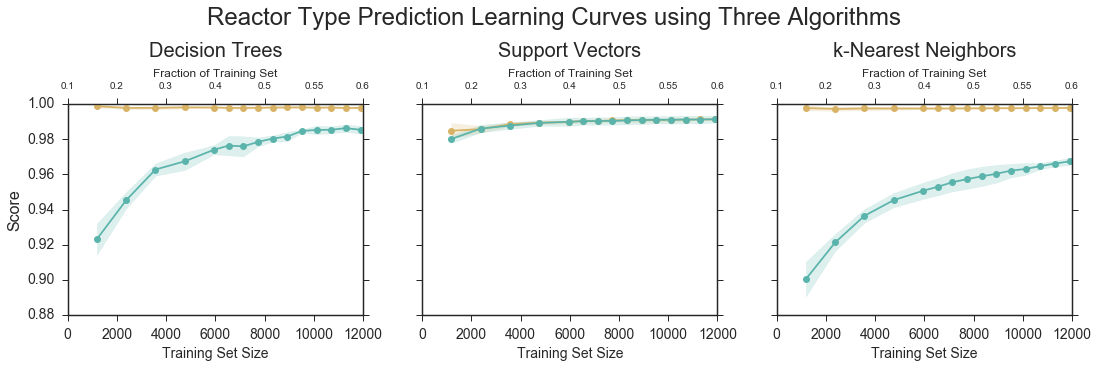

In [62]:
fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
knn = ['knn', 'k-Nearest Neighbors', ax_knn]
dtree = ['dtree', 'Decision Trees', ax_dtree]
svr = ['svr', 'Support Vectors', ax_svr]

ax_knn.set_ylabel('Score', fontsize=16)
#ax.set_ylim(0.7, 1.01)

for alg, alg_title, ax in [knn, dtree, svr]:
    lc = rxtr_lc.loc[(rxtr_lc['Algorithm']==alg)]
    title = alg_title
    plot_learning_curve(lc, title, fig, ax)

fig.suptitle('Reactor Type Prediction Learning Curves using Three Algorithms', fontsize=24)
fig.subplots_adjust(top=.71)
plt.legend(loc=(1.1, 0.5))
#for l in leg.legendHandles:
#    l.set_alpha(1)
fig.show()
fig.savefig('../results/4oct2018/graphs/rxtr_learning.png', bbox_inches='tight', transparent=True)

## Burnup

/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


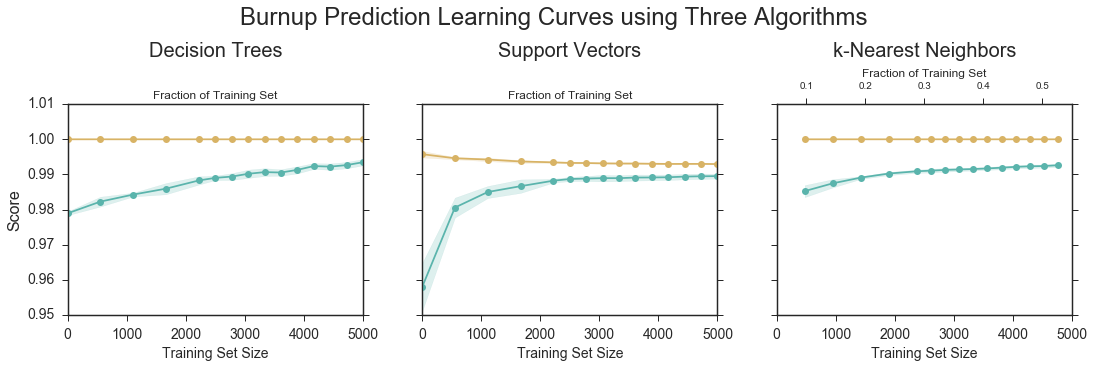

In [51]:
fig.clf()

fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
knn = ['knn', 'k-Nearest Neighbors', ax_knn]
dtree = ['dtree', 'Decision Trees', ax_dtree]
svr = ['svr', 'Support Vectors', ax_svr]

ax_knn.set_ylabel('Score', fontsize=16)
#ax.set_ylim(0.7, 1.01)

for alg, alg_title, ax in [knn, dtree, svr]:
    lc = burn_lc.loc[(burn_lc['Algorithm']==alg)]
    title = alg_title
    plot_learning_curve(lc, title, fig, ax)

fig.suptitle('Burnup Prediction Learning Curves using Three Algorithms', fontsize=24)
plt.subplots_adjust(top=.71)
plt.legend(loc=(1.1, 0.5))
#for l in leg.legendHandles:
#    l.set_alpha(1)
fig.show()
fig.savefig('../results/4oct2018/graphs/burn_learning.png', bbox_inches='tight', transparent=True)

## Enrichment

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


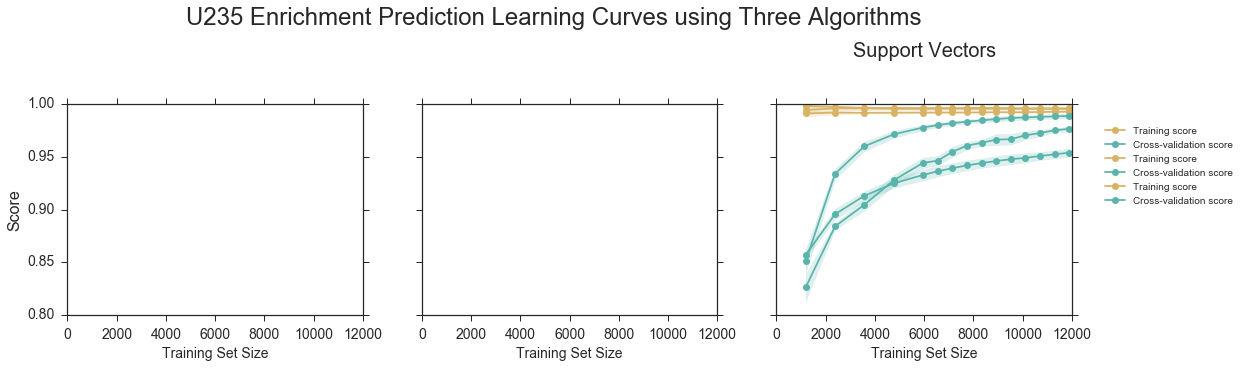

In [24]:
fig.clf()

fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
knn = ['knn', 'k-Nearest Neighbors', ax_knn]
dtree = ['dtree', 'Decision Trees', ax_dtree]
svr = ['svr', 'Support Vectors', ax_svr]

ax_knn.set_ylabel('Score', fontsize=16)
#ax.set_ylim(0.7, 1.01)

for alg, alg_title, ax in [knn, dtree, svr]:
    lc = enri_lc.loc[(enri_lc['Algorithm']==alg)]
    title = alg_title
    plot_learning_curve(lc, title, fig, ax)

fig.suptitle('U235 Enrichment Prediction Learning Curves using Three Algorithms', fontsize=24)
plt.subplots_adjust(top=.71)
plt.legend(loc=(1.1, 0.5))
#for l in leg.legendHandles:
#    l.set_alpha(1)
fig.show()
fig.savefig('../results/4oct2018/graphs/enri_learning.png', bbox_inches='tight', transparent=True)

## Cooling Time

/usr/lib/python3/dist-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


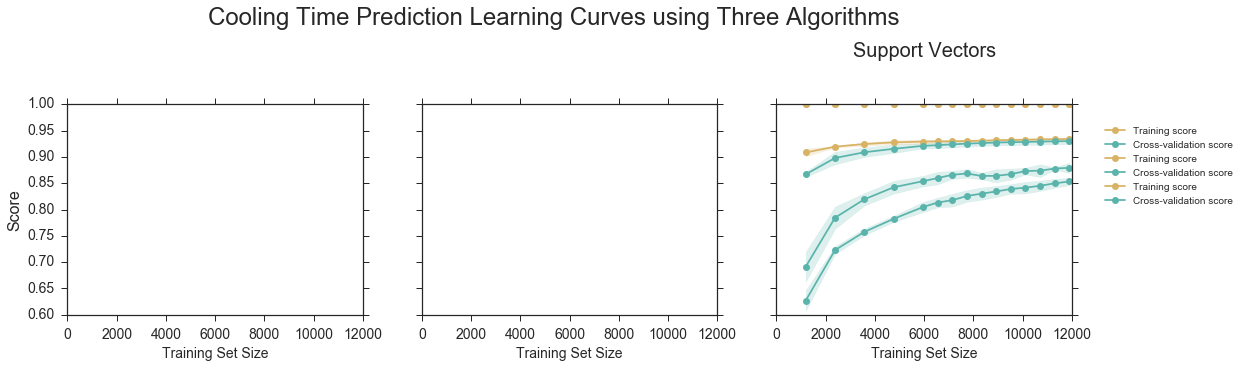

In [25]:
fig.clf()

fig, (ax_knn, ax_dtree, ax_svr) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True, figsize=(18, 5))
knn = ['knn', 'k-Nearest Neighbors', ax_knn]
dtree = ['dtree', 'Decision Trees', ax_dtree]
svr = ['svr', 'Support Vectors', ax_svr]

ax_knn.set_ylabel('Score', fontsize=16)
#ax.set_ylim(0.7, 1.01)

for alg, alg_title, ax in [knn, dtree, svr]:
    lc = cool_lc.loc[(cool_lc['Algorithm']==alg)]
    title = alg_title
    plot_learning_curve(lc, title, fig, ax)

fig.suptitle('Cooling Time Prediction Learning Curves using Three Algorithms', fontsize=24)
plt.subplots_adjust(top=.71)
plt.legend(loc=(1.1, 0.5))
#for l in leg.legendHandles:
#    l.set_alpha(1)
fig.show()
fig.savefig('../results/4oct2018/graphs/cool_learning.png', bbox_inches='tight', transparent=True)